In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from scipy.stats import norm
#from scipy.stats import lognorm
import matplotlib.mlab as mlab
#import scipy


In [90]:
# Read the datafile
wine_data = pd.read_csv('../data/rawdata/wine-reviews/winemag-data-130k-v2.csv')

In [4]:
wine_data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [5]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
wine_data.count()

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [7]:
wine_data.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [9]:
country_province = wine_data.groupby(['taster_name']).mean()
country_province.reset_index
country_province = country_province.reset_index()
country_province.head()

,taster_name,Unnamed: 0,points,price
0,Alexander Peartree,63922.395181,85.855422,29.053269
1,Anna Lee C. Iijima,66204.838732,88.415629,29.790112
2,Anne Krebiehl MW,66607.729715,90.562551,31.230135
3,Carrie Dykes,76156.568345,86.395683,30.753623
4,Christina Pickard,55558.166667,87.833333,29.333333


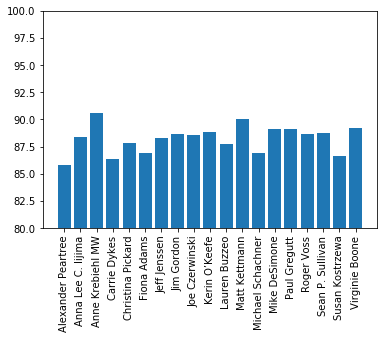

In [10]:
plt.bar(country_province['taster_name'],country_province['points'])
plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

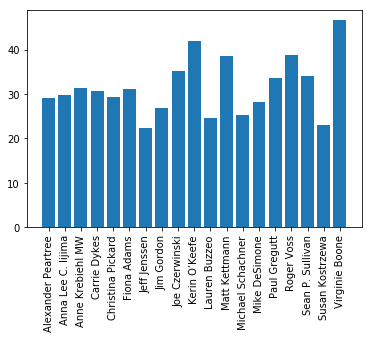

In [11]:
plt.bar(country_province['taster_name'],country_province['price'])
#plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

In [12]:
price = country_province.price
points = country_province.points
taster = country_province.taster_name

In [13]:
country_df = wine_data.groupby(['country']).mean()
country_df = country_df.reset_index()
country_df.head()

,country,Unnamed: 0,points,price
0,Argentina,65075.723158,86.710263,24.510117
1,Armenia,37158.000000,87.500000,14.500000
2,Australia,65037.539287,88.580507,35.437663
3,Austria,65614.296861,90.101345,30.762772
4,Bosnia and Herzegovina,56613.000000,86.500000,12.500000


In [14]:
country_price = country_df.price
country_points = country_df.points
country = country_df.country

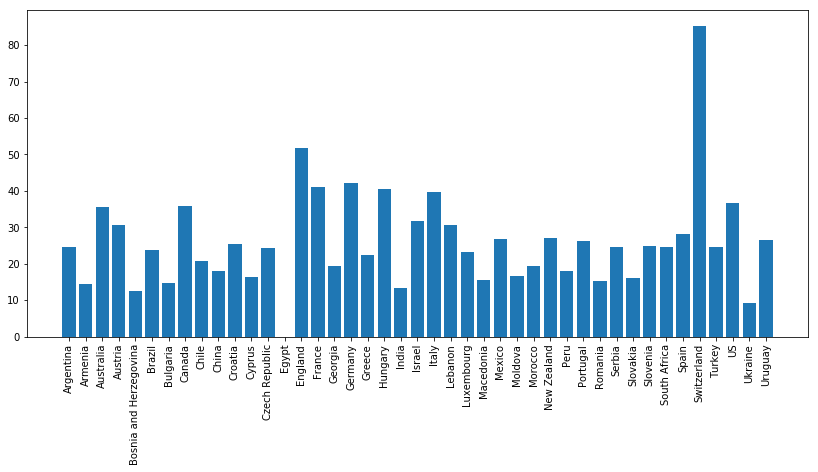

In [15]:
plt.figure(figsize=(14,6))
plt.bar(country,country_price)
plt.xticks(rotation=90)

plt.show()

In [16]:
country_count = wine_data.groupby('country').count()
country_count = country_count.reset_index()
country_count = country_count.sort_values('Unnamed: 0')
country = country_count.country
#country_count = country_count.reset_index()
#country_province.head()
#country_count.head()

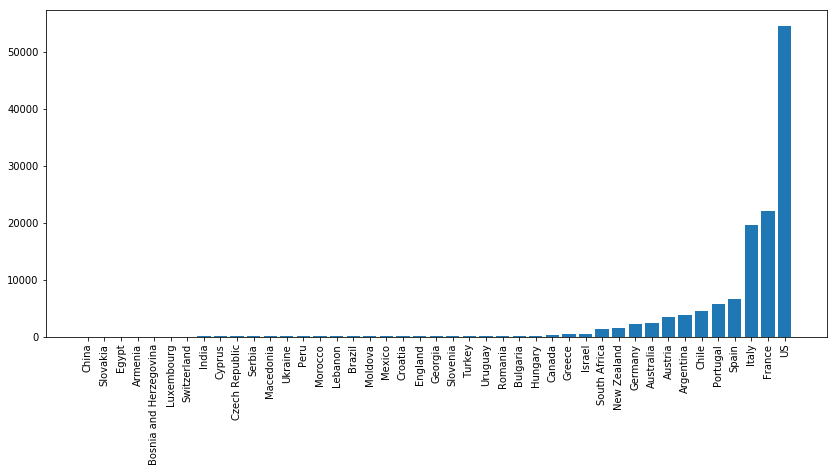

In [17]:
country = country_count.country
n_country = country_count['Unnamed: 0']
plt.figure(figsize=(14,6))
plt.bar(country,n_country)
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

In [18]:
clean_data = wine_data.dropna(subset=['country', 'price', 'points'])
clean_data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [19]:
#clean_data.taster_name.value_counts()

In [20]:
#clean_data.country.value_counts()

In [21]:
ccountry = clean_data.country
cprice = clean_data.price
cpoints = clean_data.points
cprovince = clean_data.province
clean_data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [22]:
median_price = clean_data.groupby('points').median()
median_price = median_price.reset_index()
#median_price.head()

avg_price = clean_data.groupby('points').mean()
#avg_price.head()


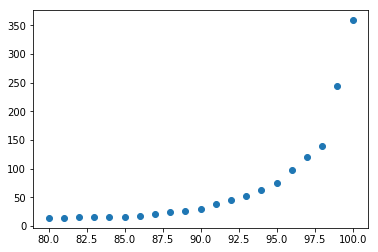

In [23]:
plt.scatter(median_price['points'],median_price['price'])
plt.show()

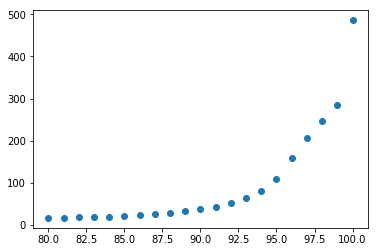

In [24]:
plt.scatter(median_price['points'],avg_price['price'])
plt.show()

In [25]:
avg_price = clean_data.groupby('points').mean()
avg_price = avg_price.reset_index()
avg_price.head()

,points,Unnamed: 0,price
0,80,74968.572152,16.372152
1,81,70810.191176,17.182353
2,82,67098.678330,18.870767
3,83,67893.402633,18.237353
4,84,63399.280630,19.314581


In [26]:
clean_data_med = clean_data.groupby('points').median()
clean_data_med = clean_data_med.reset_index()
clean_data_err = clean_data.groupby('points').sem()
clean_data_err = clean_data_err.reset_index()

#clean_data_med.head()
#us_med = us.groupby('points').median()
#us_med = us_med.reset_index()
#us_err = us.groupby('points').sem()
#us_err = us_err.reset_index()

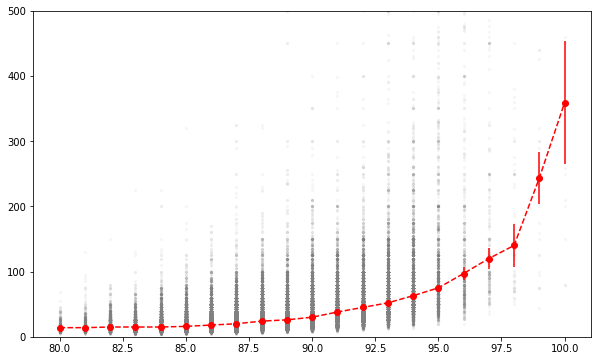

In [27]:
plt.figure(figsize=(10,6))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(clean_data_med.points, clean_data_med.price, clean_data_err.price, fmt="o--",c='r')
plt.scatter(cpoints,cprice,alpha=0.05,s=5, c='gray')
#plt.errorbar(france_med.points, france_med.price,france_err.price, fmt="s")
#plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d")
#plt.grid()
#plt.plot(b['points'],b['price'])
plt.ylim(0,500)
plt.show()

In [28]:
us = clean_data.loc[clean_data['country']=='US',['points','price']]
france = clean_data.loc[clean_data['country']=='France',['points','price']]
italy = clean_data.loc[clean_data['country']=='Italy',['points','price']]
spain = clean_data.loc[clean_data['country']=='Spain',['points','price']]
portugal = clean_data.loc[clean_data['country']=='Portugal',['points','price']]
argentina = clean_data.loc[clean_data['country']=='Argentina',['points','price']]
austria = clean_data.loc[clean_data['country']=='Austria',['points','price']]
australia = clean_data.loc[clean_data['country']=='Australia',['points','price']]
germany = clean_data.loc[clean_data['country']=='Germany',['points','price']]
newzealand = clean_data.loc[clean_data['country']=='New Zealand',['points','price']]
southafrica = clean_data.loc[clean_data['country']=='South Africa',['points','price']]
israel = clean_data.loc[clean_data['country']=='Israel',['points','price']]
greece = clean_data.loc[clean_data['country']=='Greece',['points','price']]
canada = clean_data.loc[clean_data['country']=='Canada',['points','price']]

In [29]:
us_med = us.groupby('points').median()
us_med = us_med.reset_index()
us_err = us.groupby('points').sem()
us_err = us_err.reset_index()

france_med = france.groupby('points').median()
france_med = france_med.reset_index()
france_err = france.groupby('points').sem()
france_err = france_err.reset_index()

italy_med = italy.groupby('points').median()
italy_med = italy_med.reset_index()
italy_err = italy.groupby('points').sem()
italy_err = italy_err.reset_index()

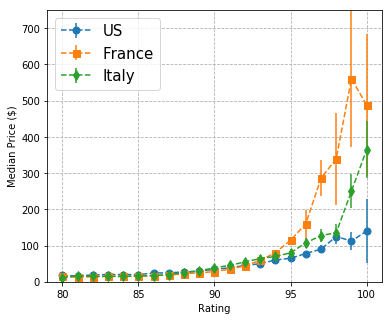

In [30]:
plt.figure(figsize=(6,5))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(us_med.points, us_med.price, us_err.price, fmt="--o", label='US', markersize=7)
plt.errorbar(france_med.points, france_med.price, france_err.price, fmt="s--", label='France', markersize=7)
plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d--", label='Italy', markersize=7)
plt.grid(linestyle='--')
plt.ylim(0,750)
plt.xticks(range(80,101,5))
#plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
plt.legend(loc='upper left',prop={'size':15})

plt.show()

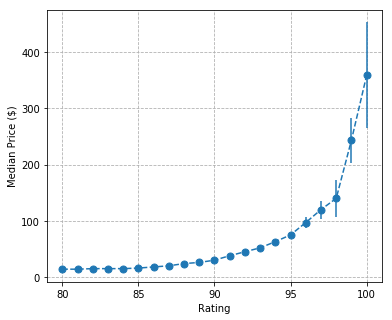

In [31]:
#plt.errorbar(clean_data_med.points, clean_data_med.price, clean_data_err.price, fmt="o")
plt.figure(figsize=(6,5))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(clean_data_med.points, clean_data_med.price, clean_data_err.price, fmt="o--", markersize=7)
plt.grid(linestyle='--')
#plt.ylim(0,750)
plt.xticks(range(80,101,5))
#plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
#plt.legend(loc='upper left',prop={'size':15})

plt.show()

C:\Users\alaq3\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


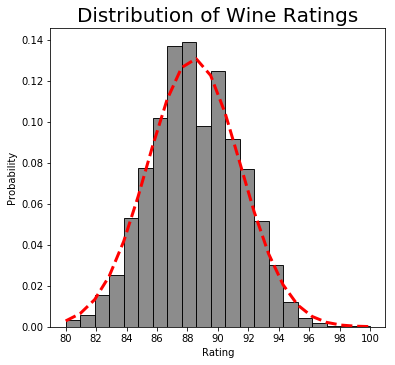

In [32]:
plt.figure(figsize=(6,5.5))
x = clean_data['points']
num_bins = 21
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, normed=1, edgecolor='k',histtype='bar',align='mid')
(mu, sigma) = norm.fit(x)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.9, normed=1, edgecolor='k',histtype='bar')
n, bins, patches = plt.hist(x, num_bins, facecolor='gray', alpha=0.9, density=1, edgecolor='k',histtype='bar')
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=3)
#n, bins, patches = plt.hist(x, num_bins,align='mid',line=True)
#plt.figure(figsize=(6,5))
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Probability')

#plt.title('Distribution of Wine Reviews')
#plt.title(r'$\mathrm{Distribution\ of\ Wine\ Reviews:}\ mean=%.1f,\ \sigma=%.3f$' %(mu, sigma))
#plt.title(r'$\mathrm{Distribution\ of\ Wine\ Reviews:}\ mean=%.1f$' %(mu),fontsize=20)
plt.title('Distribution of Wine Ratings',fontsize=20)
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)
plt.show()

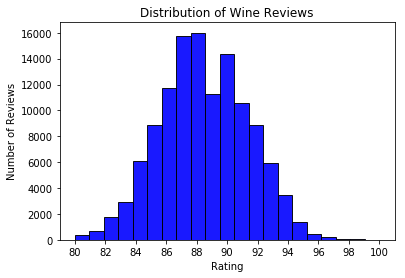

In [33]:
x = clean_data['points']
num_bins = 21
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, normed=1, edgecolor='k',histtype='bar',align='mid')
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.9, edgecolor='k',histtype='bar')
#n, bins, patches = plt.hist(x, num_bins,align='mid',line=True)
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Wine Reviews')
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)
plt.show()

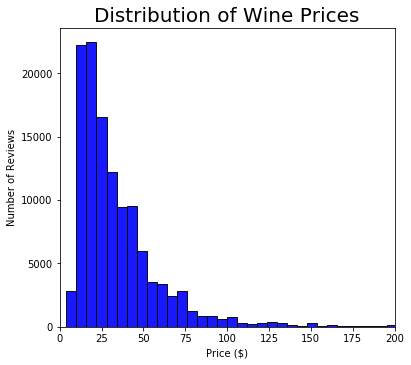

In [34]:
plt.figure(figsize=(6,5.5))
x = clean_data['price']
num_bins = 550
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.9, normed=1, edgecolor='k', histtype='bar',align='mid')
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.9, edgecolor='k', histtype='bar',align='mid')

#plt.xticks(range(0,201,25))
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Wine Prices',fontsize=20)
#plt.xscale('log')
#plt.plot(bins, y, 'r--')
plt.xlim(0,200)
plt.show()

C:\Users\alaq3\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


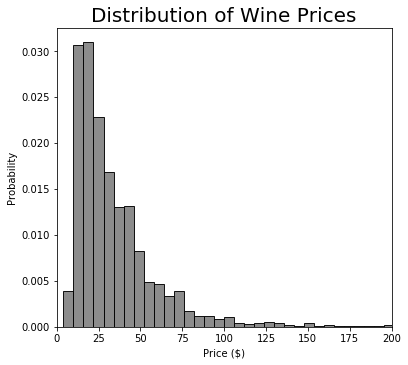

In [35]:
plt.figure(figsize=(6,5.5))
x = clean_data['price']
num_bins = 550
n, bins, patches = plt.hist(x, num_bins, facecolor='gray', alpha=0.9, normed=1, edgecolor='k', histtype='bar',align='mid')
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.9, edgecolor='k', histtype='bar',align='mid')

#plt.xticks(range(0,201,25))
plt.xlabel('Price ($)')
plt.ylabel('Probability')
#plt.title('Distribution of Wine Prices')
plt.title('Distribution of Wine Prices',fontsize=20)
#plt.xscale('log')
#plt.plot(bins, y, 'r--')
plt.xlim(0,200)
plt.show()

In [36]:
ccountry[:10]
#plt.scatter(ccountry[:10],cprovince[:10])

1     Portugal
2           US
3           US
4           US
5        Spain
6        Italy
7       France
8      Germany
9       France
10          US
Name: country, dtype: object

In [37]:
wine_type = clean_data.groupby('variety').count()
wine_type.reset_index()
wine_type = wine_type.sort_values('Unnamed: 0',ascending=False)
wine_type.head(2)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery
variety,,,,,,,,,,,,,
Pinot Noir,12785,12785,12785,9543,12785,12785,12785,11693,9008,9833,9622,12785,12785
Chardonnay,11077,11077,11077,7365,11077,11077,11077,10070,6377,8292,7935,11077,11077


In [38]:
country_group = clean_data.groupby(['country','points'])['price'].median()

In [39]:
a=pd.DataFrame(country_group)

In [40]:
a = a.reset_index()

In [41]:
a.head()

,country,points,price
0,Argentina,80,13.0
1,Argentina,81,12.0
2,Argentina,82,13.0
3,Argentina,83,13.0
4,Argentina,84,13.0


In [42]:
len(a)

461

In [43]:
a.country.value_counts().head(10)

Portugal     21
France       21
US           21
Italy        21
Australia    21
Spain        19
Germany      18
Argentina    18
Chile        16
Hungary      16
Name: country, dtype: int64

In [44]:
clean_data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [45]:

us_med = us.groupby('points').median()
us_med = us_med.reset_index()
us_err = us.groupby('points').sem()
us_err = us_err.reset_index()

france_med = france.groupby('points').median()
france_med = france_med.reset_index()
france_err = france.groupby('points').sem()
france_err = france_err.reset_index()

italy_med = italy.groupby('points').median()
italy_med = italy_med.reset_index()
italy_err = italy.groupby('points').sem()
italy_err = italy_err.reset_index()


#us_err.head()
#us_err.head()

In [46]:
avgs = clean_data.groupby('country')['price','points'].median()
avgs = avgs.reset_index()
avgs.head()

,country,price,points
0,Argentina,17.0,87.0
1,Armenia,14.5,87.5
2,Australia,21.0,89.0
3,Austria,25.0,90.0
4,Bosnia and Herzegovina,12.5,86.5


In [47]:
med_price = clean_data.groupby('country')[['price']].median()
avgs_point = clean_data.groupby('country')[['points']].mean()
counts = clean_data.groupby('country')[['price']].count()


med_price = med_price.reset_index()
avgs_point = avgs_point.reset_index()
counts = counts.reset_index()

#counts.head()

In [48]:
test_df = pd.merge(counts, avgs_point, on='country')
test_df = pd.merge(test_df, med_price, on='country')
test_df.columns = ['country', 'count', 'points', 'price']
test_df.head()

,country,count,points,price
0,Argentina,3756,86.710330,17.0
1,Armenia,2,87.500000,14.5
2,Australia,2294,88.595466,21.0
3,Austria,2799,90.190782,25.0
4,Bosnia and Herzegovina,2,86.500000,12.5


In [49]:
test_df.dtypes

country     object
count        int64
points     float64
price      float64
dtype: object

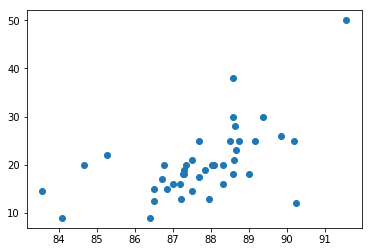

In [84]:

plt.scatter(test_df['points'], test_df['price'])
plt.show()

In [85]:
test_df.head(50)

,country,count,points,price
0,Argentina,3756,86.710330,17.0
1,Armenia,2,87.500000,14.5
2,Australia,2294,88.595466,21.0
3,Austria,2799,90.190782,25.0
4,Bosnia and Herzegovina,2,86.500000,12.5
5,Brazil,47,84.659574,20.0
6,Bulgaria,141,87.936170,13.0
7,Canada,254,89.377953,30.0
8,Chile,4416,86.495471,15.0
9,China,1,89.000000,18.0


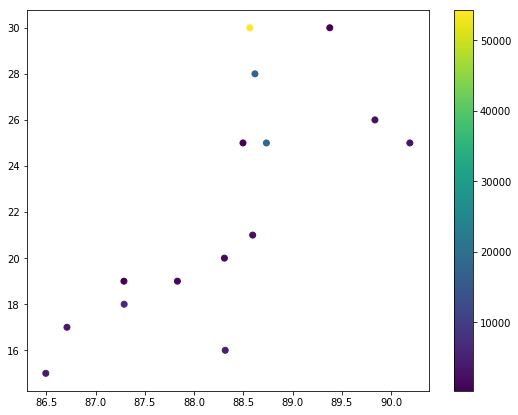

In [89]:
test2_df = test_df[test_df['count']>=200]
plt.figure(figsize=(9,7))
plt.scatter(test2_df['points'], test2_df['price'], c=test2_df['count'])
plt.colorbar()

plt.show()

In [87]:
test2_df.head(50)

,country,count,points,price
0,Argentina,3756,86.710330,17.0
2,Australia,2294,88.595466,21.0
3,Austria,2799,90.190782,25.0
8,Chile,4416,86.495471,15.0
14,France,17776,88.734867,25.0
16,Germany,2120,89.836321,26.0
21,Italy,16914,88.618186,28.0
28,New Zealand,1378,88.308418,20.0
30,Portugal,4875,88.316718,16.0
35,South Africa,1293,87.831400,19.0


In [53]:
#test2_df.head(50)

In [54]:
a = clean_data.groupby(['taster_name','country'])['points'].count()
a = a.reset_index()
a.head()

,taster_name,country,points
0,Alexander Peartree,US,413
1,Anna Lee C. Iijima,Bosnia and Herzegovina,1
2,Anna Lee C. Iijima,Bulgaria,19
3,Anna Lee C. Iijima,Canada,15
4,Anna Lee C. Iijima,Croatia,39


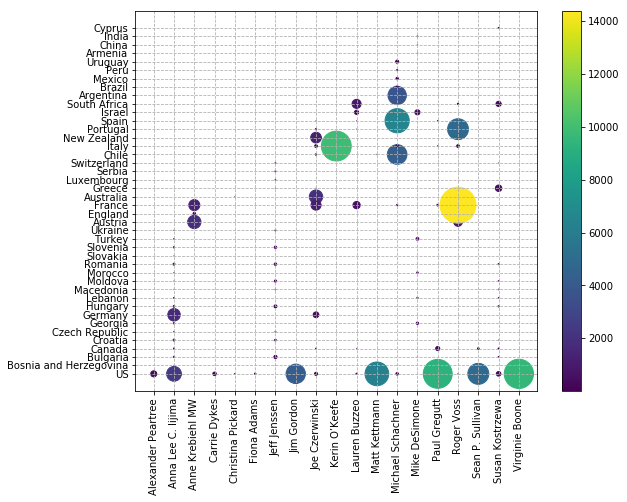

In [55]:
plt.figure(figsize=(9,7))
plt.scatter(a.taster_name,a.country,s=a.points*.09,c=a.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.colorbar()
#plt.legend()
plt.show()

In [56]:
b = clean_data.groupby(['taster_name'])['country','points'].count()
b = b.reset_index()
b = b.sort_values(by='country')
b.head(20)
taster_list  = b[b['country']>=1000]['taster_name']

In [57]:
taster_list=list(taster_list)
taster_list

['Susan Kostrzewa',
 'Lauren Buzzeo',
 'Anne Krebiehl\xa0MW',
 'Jim Gordon',
 'Anna Lee C. Iijima',
 'Sean P. Sullivan',
 'Joe Czerwinski',
 'Matt Kettmann',
 'Paul Gregutt',
 'Virginie Boone',
 'Kerin O’Keefe',
 'Michael Schachner',
 'Roger Voss']

In [58]:
Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()

dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rose', 'Sparkling', 'Dessert'])

In [59]:
df_variety=pd.DataFrame()
for x in Wine_types.keys():
   wt=pd.DataFrame([])
   for y in range(len(Wine_types[x])):
       #print('type=',x,'subtype=',Wine_types[x][y])
       wt=wt.append(clean_data[clean_data.variety.str.contains(Wine_types[x][y],na=False)])
       wt.head()
   wt.variety=x
   df_variety=df_variety.append(wt)

df_variety.groupby('variety')['price'].apply(lambda x: x.count())

variety
Bold Red       19719
Dessert         4068
Light Red      14877
Light White     7602
Medium Red     12582
Rich White     12791
Sparkling       1412
Sweet White     5930
Name: price, dtype: int64

In [60]:
df_variety.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Bold Red,Felix Lavaque
17,17,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Bold Red,Gaucho Andino


In [61]:
aa = df_variety.groupby(['taster_name','variety'])['points'].count()
#aa = df_variety.groupby(['taster_name','variety','country'])['points'].count()

aa = aa.reset_index()
aa.head()

,taster_name,variety,points
0,Alexander Peartree,Bold Red,38
1,Alexander Peartree,Dessert,3
2,Alexander Peartree,Light Red,13
3,Alexander Peartree,Light White,17
4,Alexander Peartree,Medium Red,66


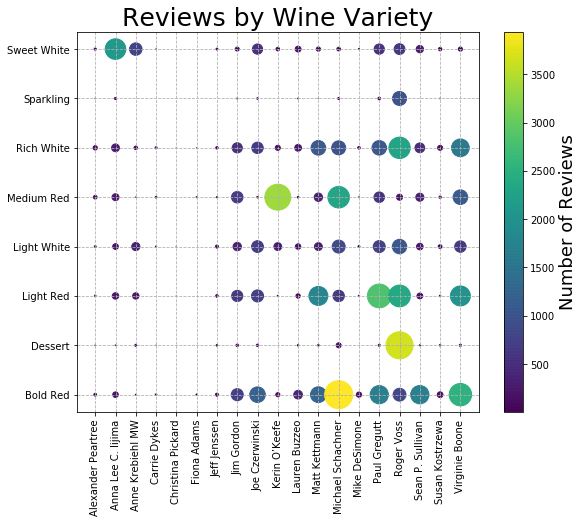

In [62]:
plt.figure(figsize=(9,7))
plt.scatter(aa.taster_name,aa.variety,s=aa.points*.2,c=aa.points,alpha=0.99)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Wine Variety',fontsize=25)

plt.show()

In [63]:
bb = df_variety.groupby(['taster_name','country'])['points'].count()
#aa = df_variety.groupby(['taster_name','variety','country'])['points'].count()

bb = bb.reset_index()
bb.head()

,taster_name,country,points
0,Alexander Peartree,US,254
1,Anna Lee C. Iijima,Bulgaria,10
2,Anna Lee C. Iijima,Canada,11
3,Anna Lee C. Iijima,Croatia,3
4,Anna Lee C. Iijima,Czech Republic,1


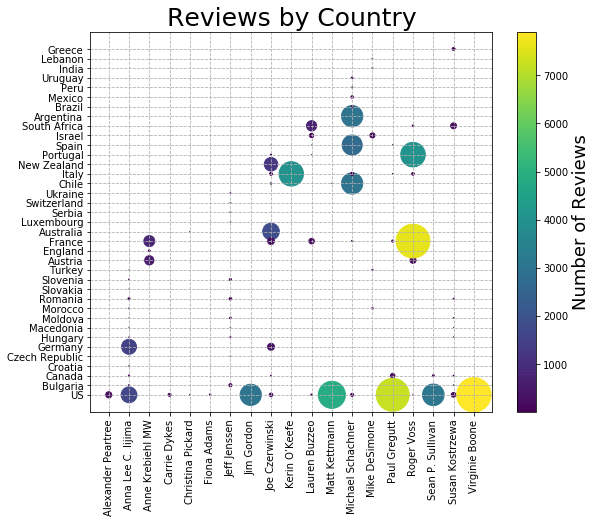

In [64]:
plt.figure(figsize=(9,7))
plt.scatter(bb.taster_name,bb.country,s=bb.points*.15,c=bb.points,alpha=0.99)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Country',fontsize=25)

plt.show()

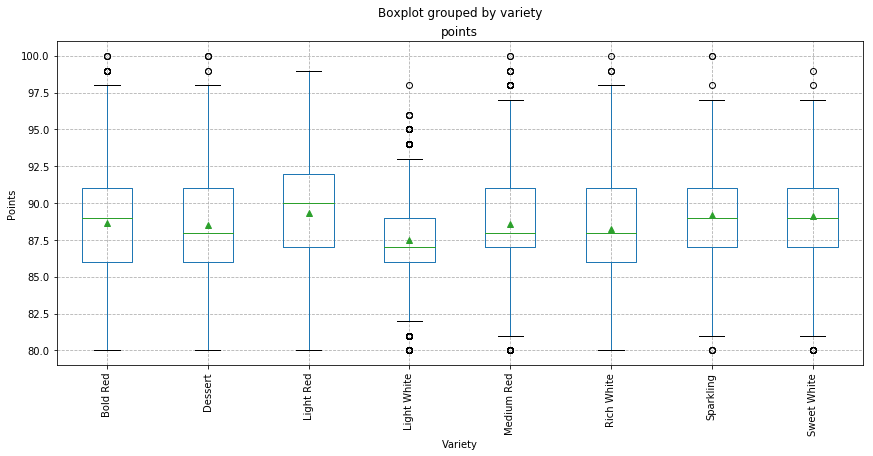

In [65]:
#cleaclean_data.sort(ascending=False)
df_variety.boxplot("points", by="variety", figsize=(14, 6), showmeans=True)
plt.grid(linestyle='--')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

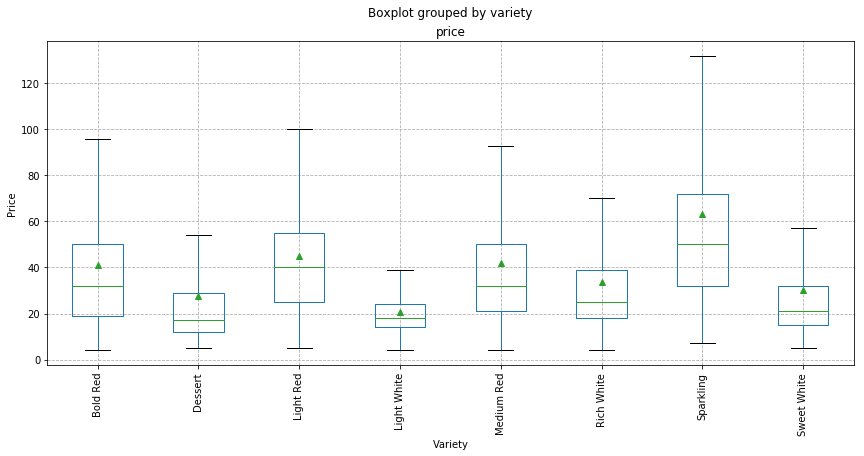

In [66]:
#cleaclean_data.sort(ascending=False)
df_variety.boxplot("price", by="variety", figsize=(14, 6), showmeans=True, showfliers=False)
plt.grid(linestyle='--')
#plt.suptitle('Price by Variety')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

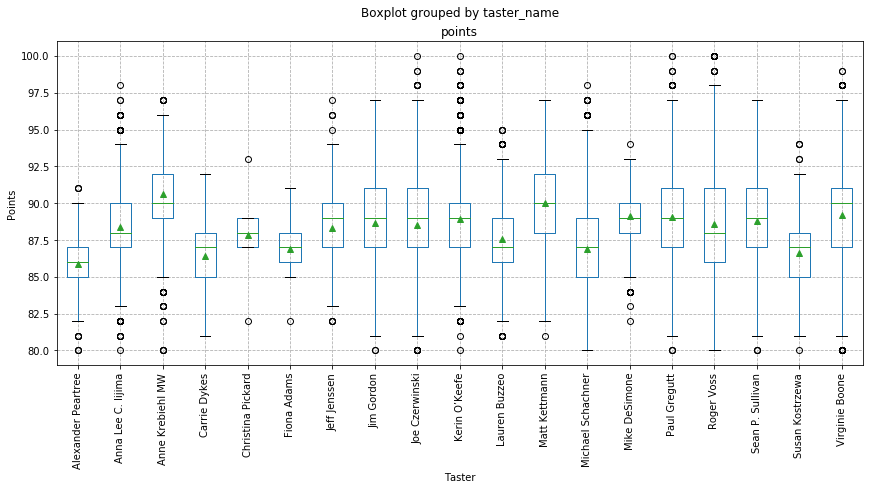

In [67]:
#cleaclean_data.sort(ascending=False)
clean_data.boxplot("points", by="taster_name", figsize=(14, 6), showmeans=True)
plt.grid(linestyle='--')
plt.xlabel('Taster')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

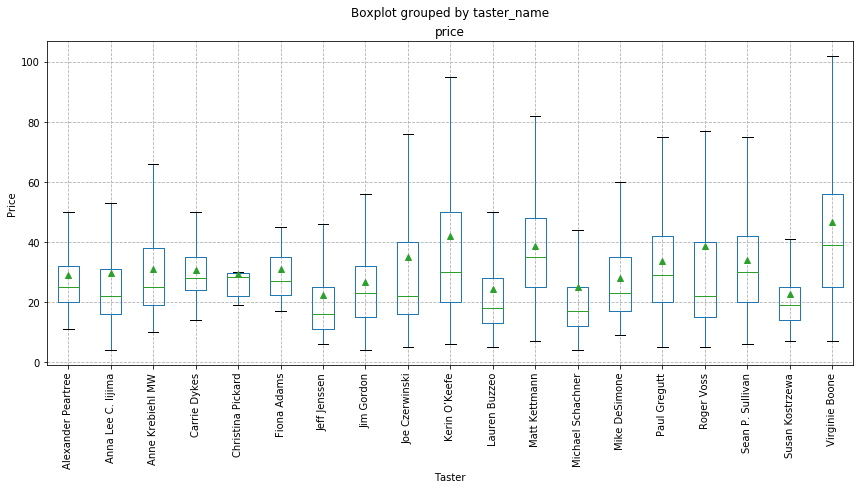

In [68]:
clean_data.boxplot("price", by="taster_name", figsize=(14, 6), showmeans=True, showfliers=False)
plt.grid(linestyle='--')
plt.xlabel('Taster')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

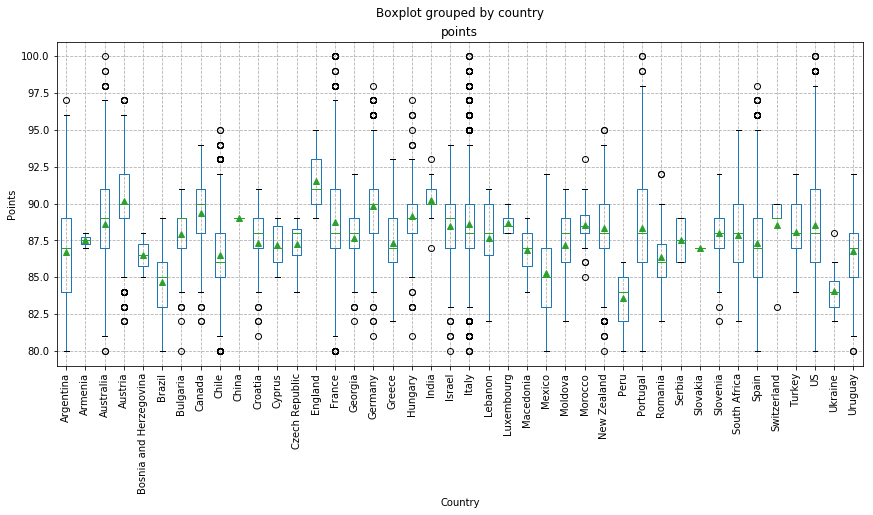

In [69]:
#cleaclean_data.sort(ascending=False)
clean_data.boxplot("points", by="country", figsize=(14, 6), showmeans=True)
plt.grid(linestyle='--')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

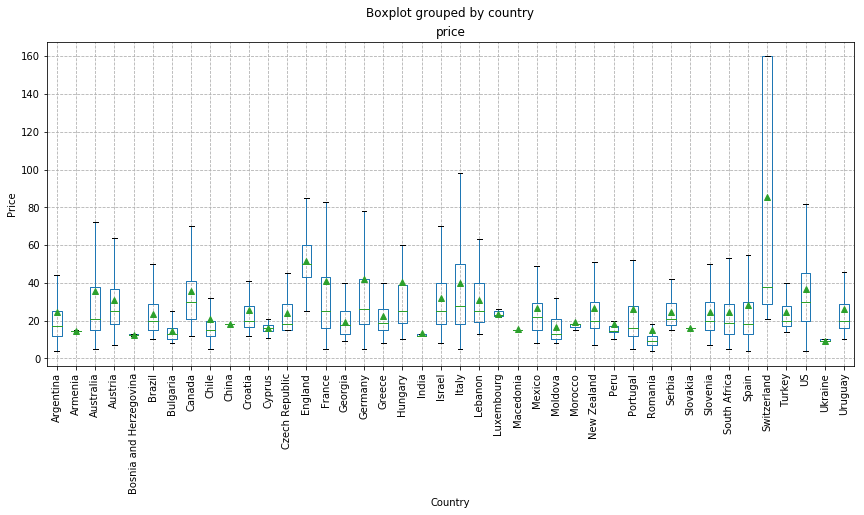

In [70]:
clean_data.boxplot("price", by="country", figsize=(14, 6), showmeans=True, showfliers=False)
plt.grid(linestyle='--')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [71]:
bubble = df_variety[['country','variety','price','points']]

In [72]:
bubble.head()

,country,variety,price,points
16,Argentina,Bold Red,30.0,87
17,Argentina,Bold Red,13.0,87
59,US,Bold Red,55.0,86
160,France,Bold Red,35.0,91
224,Argentina,Bold Red,22.0,90


In [73]:
bubble['variety'].unique()

array(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White',
       'Sweet White', 'Sparkling', 'Dessert'], dtype=object)

In [74]:
len(bubble)

78981

In [75]:
bubble['color'] = 0

C:\Users\alaq3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
bubble.head()

,country,variety,price,points,color
16,Argentina,Bold Red,30.0,87,0
17,Argentina,Bold Red,13.0,87,0
59,US,Bold Red,55.0,86,0
160,France,Bold Red,35.0,91,0
224,Argentina,Bold Red,22.0,90,0


In [77]:
bubble.loc[bubble['variety']=='Bold Red', 'color'] = 'red'
bubble.loc[bubble['variety']=='Medium Red', 'color'] = 'magenta'
bubble.loc[bubble['variety']=='Light Red', 'color'] = 'lightcoral'
bubble.loc[bubble['variety']=='Rich White', 'color'] = 'gold'
bubble.loc[bubble['variety']=='Light White', 'color'] = 'lightskyblue'
bubble.loc[bubble['variety']=='Sweet White', 'color'] = 'green'
bubble.loc[bubble['variety']=='Sparkling', 'color'] = 'gray'
bubble.loc[bubble['variety']=='Dessert', 'color'] = 'blue'

C:\Users\alaq3\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


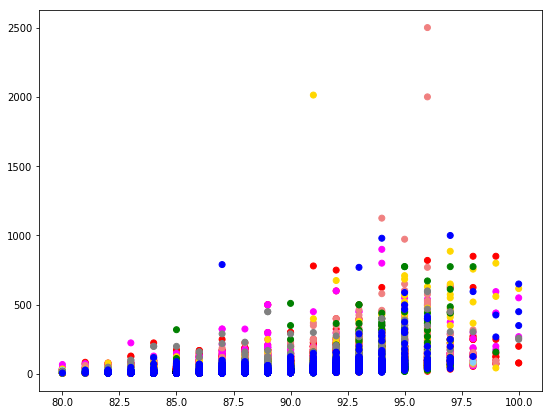

In [78]:
#test2_df = test_df[test_df['count']>=500]
plt.figure(figsize=(9,7))
plt.scatter(bubble['points'], bubble['price'], c=bubble['color'])
#plt.colorbar()

plt.show()

In [79]:
b_med_price = bubble.groupby('variety')[['price']].median()
b_avgs_point = bubble.groupby('variety')[['points']].mean()

In [80]:
len(b_avgs_point)

8

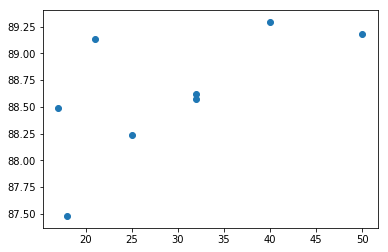

In [81]:
plt.scatter(b_med_price,b_avgs_point)

In [82]:
b_med_price.head(10)

,price
variety,
Bold Red,32.0
Dessert,17.0
Light Red,40.0
Light White,18.0
Medium Red,32.0
Rich White,25.0
Sparkling,50.0
Sweet White,21.0
